# ***Today's Topic is OCR ***
**optical character recognition**

means visualize and get text

There are varuious approches for ocr in the tutorial we focus on the ocr from pre-trained model of keras - tensorflow as it is easy to use

ocr is composed of mainly two processes
1. character detection
2. character recognition

1. character detection
  means you have to first highlight the region of interest in an image. the region of intrest consists of character, yet we only detect the character but we don't know which of them character is what?

2. character recognition
  means the model further investigate in the region of interest to recognize the characters, it is a process of object recognition

they boht comes under computer vision domain.

so lets go through the coading part

keras has a pre-trained OCR model we can get them by either
pip install git+https://github.com/faustomorales/keras-ocr.git#egg=keras-ocr
or
pip install keras-ocr

In [1]:
!pip install keras-ocr

     |████████████████████████████████| 174kB 4.9MB/s 
     |████████████████████████████████| 9.5MB 9.9MB/s 
     |████████████████████████████████| 819kB 43.4MB/s 
     |████████████████████████████████| 133kB 55.4MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
  Created wheel for keras-ocr: filename=keras_ocr-0.8.4-cp36-none-any.whl size=148639 sha256=a41d4c08625e5ded7c629bd59b5cedc5eb5033966f5db593b8bbe096e2c69381
  Stored in directory: /root/.cache/pip/wheels/e6/4b/03/a9bf717ffaae60b05c9bdbe05cb16854aa5b83188e046c72a3
Successfully built keras-ocr


once keras-ocr is downloaded to the colab it's time to import python packages.
here we import matplot lib that will help us to visualize the processed images
also by importing keras-ocr package. we automatically downloaded the weight and bias of the detector and recognizer model.

In [2]:
import matplotlib.pyplot as plt

import keras_ocr as ocr

we have to get the images on which we can run our models. so for this i uploaded some images to the wikimwdia website and use there url to directly get the images using keras_ocr.tools

In [3]:
images = [
    ocr.tools.read(url) for url in [
        'https://upload.wikimedia.org/wikipedia/commons/0/0e/Textured-letterboard-2-1164025.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/8/87/Shavers-1425139.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/3/3c/Rugby-1-1557046.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/6/66/No-description-1444769.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/2/2b/Pike-place-market-signs-3-1442339.jpg'
    ]
]

we also created a pipeline, you can consider pipeline as a simple pipe where we feed input images to one end of the pipe and got OCR on the other side

In [4]:
ocr_pipeline = ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /root/.keras-ocr/crnn_kurapan.h5


now we run our pipeline to get the predictions

In [5]:
prediction_groups = ocr_pipeline.recognize(images)

and at last ploting of imageswith labels

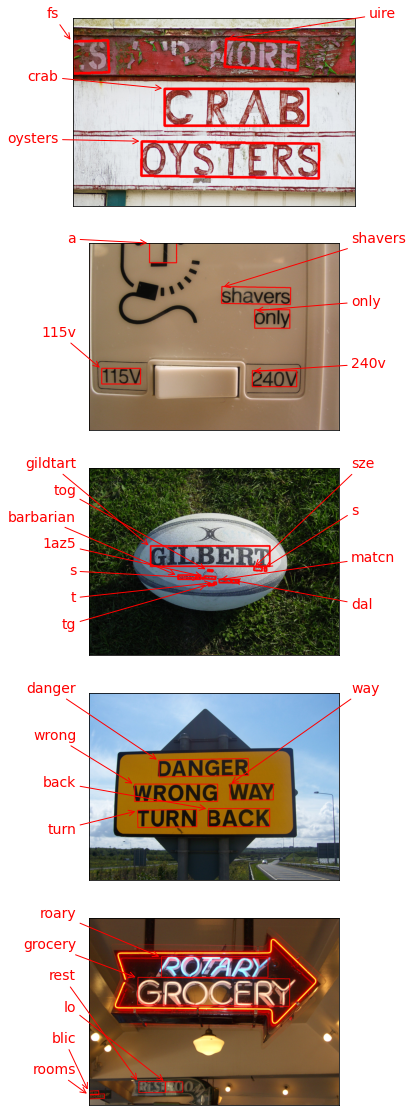

In [6]:
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for ax, image, predictions in zip(axs, images, prediction_groups):
    ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)